# Large Customer Segmentation Using Machine Learning

<b>About The Project</b>:</br>
The dataset is generated from the marketing campaign of a Big Chain Supermarket. 

In the interest of time, this project uses over 2,200 rows of customer data, but this framework is suitable to process and segment millions of rows of customer data.

<b>Important Question To Answer</b>:</br>
Can a company use data science to effectively segment millions of customers?

<b>RESULTS</b>:</br>

<b>QUICK INSIGHTS</b>:
 1. Income has high positive correlation with Spend (Monetary) and Frequency (how often shop)
 2. KidHome has high negative correlation with Spend (Monetary) and Frequency (How often shop)
 3. Customers that buy wine have teens at home, and higher web purchases, deals, and instore purchases
 4. Customers that buy Gold Products tend to have kids at home, have higher web-visits

<b>CLUSTER INSIGHTS</b>:
- Low Income (Cluster 1): Has kid(s) at home, Low Spend, Purchases "Gold Prods", "Meat Prods"
- High Income (Clusters 0, 2, 3): Spend more on Wine
- Cluster 0 (Highest Spenders): Accept Campaigns the most, have high In store and Catalog purchases

In [2]:
# Import Python Libraries
import numpy as np
import pandas as pd
import plotly.express as px

# Import Clustering & PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Import Machine Learning
import pycaret.classification as clf
from xgboost import plot_importance

In [5]:
# Data Frame Display
pd.set_option('display.max_columns', None)

In [6]:
# Convert dataset to Pandas
marketing_campaign_raw_df = pd.read_csv(    
    "data/marketing_campaign.csv", 
    sep = "\t"
)

In [7]:
marketing_campaign_raw_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [8]:
marketing_campaign_raw_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# STEP 1 DATA EXPLORATION

In [9]:
# Custom Profiling Function
def profile_data(data):
    """Panda Profiling Function

    Args:
        data (DataFrame): A data frame to profile

    Returns:
        DataFrame: A data frame with profiled data
    """
    return pd.concat(
        [
            pd.Series(data.dtypes, name = "Dtype"),
            # Counts
            pd.Series(data.count(), name = "Count"),
            pd.Series(data.isnull().sum(), name = "NA Count"),
            pd.Series(data.nunique(), name = "Count Unique"),
            # Stats
            pd.Series(data.min(), name = "Min"),
            pd.Series(data.max(), name = "Max"),
            pd.Series(data.mean(), name = "Mean"),
            pd.Series(data.median(), name = "Median"),
            pd.Series(data.mode().iloc[0], name = "Mode"),
        ],
        axis=1
    )

In [10]:
profile_df = profile_data(marketing_campaign_raw_df)

In [11]:
profile_df

,Dtype,Count,NA Count,Count Unique,Min,Max,Mean,Median,Mode
ID,int64,2240,0,2240,0,11191,5592.159821,5458.5,0
Year_Birth,int64,2240,0,59,1893,1996,1968.805804,1970.0,1976
Education,object,2240,0,5,2n Cycle,PhD,NaN,NaN,Graduation
Marital_Status,object,2240,0,8,Absurd,YOLO,NaN,NaN,Married
Income,float64,2216,24,1974,1730,666666,52247.251354,51381.5,7500
Kidhome,int64,2240,0,3,0,2,0.444196,0.0,0
Teenhome,int64,2240,0,3,0,2,0.506250,0.0,0
Dt_Customer,object,2240,0,663,01-01-2013,31-12-2013,NaN,NaN,31-08-2012
Recency,int64,2240,0,100,0,99,49.109375,49.0,56
MntWines,int64,2240,0,776,0,1493,303.935714,173.5,2


In [12]:
# Object Type
profile_df[profile_df['Dtype'] == 'object']

,Dtype,Count,NA Count,Count Unique,Min,Max,Mean,Median,Mode
Education,object,2240,0,5,2n Cycle,PhD,NaN,NaN,Graduation
Marital_Status,object,2240,0,8,Absurd,YOLO,NaN,NaN,Married
Dt_Customer,object,2240,0,663,01-01-2013,31-12-2013,NaN,NaN,31-08-2012


In [13]:
# Numeric Type
profile_df[np.isin(profile_df['Dtype'].values, ['int64', 'float64']) ]

,Dtype,Count,NA Count,Count Unique,Min,Max,Mean,Median,Mode
ID,int64,2240,0,2240,0,11191,5592.159821,5458.5,0
Year_Birth,int64,2240,0,59,1893,1996,1968.805804,1970.0,1976
Income,float64,2216,24,1974,1730,666666,52247.251354,51381.5,7500
Kidhome,int64,2240,0,3,0,2,0.444196,0.0,0
Teenhome,int64,2240,0,3,0,2,0.506250,0.0,0
Recency,int64,2240,0,100,0,99,49.109375,49.0,56
MntWines,int64,2240,0,776,0,1493,303.935714,173.5,2
MntFruits,int64,2240,0,158,0,199,26.302232,8.0,0
MntMeatProducts,int64,2240,0,558,0,1725,166.950000,67.0,7
MntFishProducts,int64,2240,0,182,0,259,37.525446,12.0,0


# STEP 2 FEATURE ENGINEERING PIPELINE

In [14]:
df = marketing_campaign_raw_df

In [15]:
# Drop NA
df = df.dropna()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [16]:
# Date Features
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [17]:
df["Dt_Customer"].max()

Timestamp('2014-12-06 00:00:00')

In [18]:
time_diff = -1 * (df["Dt_Customer"] - df["Dt_Customer"].max())

In [19]:
time_diff.dt.days

0       971
1       125
2       472
3        65
4       321
       ... 
2235    541
2236     61
2237    315
2238    316
2239    782
Name: Dt_Customer, Length: 2216, dtype: int64

In [20]:
df["Days_Customer"] = time_diff.dt.days

In [21]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,541
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,61
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,315
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,316


In [22]:
# Age
df["Age"] = df["Dt_Customer"].max().year - df['Year_Birth']

In [23]:
# Marketing Campaign Features
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df["AcceptedCmp4"] + df["AcceptedCmp5"]

In [24]:
df.sort_values('AcceptedCmp', ascending=False).head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer,Age,AcceptedCmp
430,3725,1961,PhD,Single,84865.0,0,0,2013-09-05,1,1248,16,349,43,16,16,1,2,4,9,4,0,1,1,1,1,0,3,11,1,457,53,4
1308,5758,1982,Graduation,Married,65169.0,0,0,2014-01-14,23,1074,0,69,0,0,46,1,10,4,13,6,1,0,1,1,1,0,3,11,1,326,32,4
1922,3138,1956,Graduation,Single,91249.0,0,0,2012-10-20,84,1324,27,119,71,108,27,0,7,9,6,4,0,1,1,1,1,0,3,11,1,777,58,4
2167,3520,1990,Master,Single,91172.0,0,0,2013-03-27,94,162,28,818,0,28,56,0,4,3,7,3,1,0,1,1,1,0,3,11,1,619,24,4
417,5067,1994,Graduation,Together,80134.0,0,0,2014-02-14,11,966,26,282,52,26,26,1,2,7,11,5,0,1,1,1,1,0,3,11,0,295,20,4
1710,477,1986,Graduation,Married,83512.0,0,0,2014-06-17,31,1060,61,835,80,20,101,1,4,7,10,1,1,0,1,1,1,0,3,11,1,172,28,4
252,10089,1974,Graduation,Divorced,102692.0,0,0,2013-05-04,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1,581,40,4
990,8545,1954,Graduation,Divorced,85683.0,0,0,2014-03-21,6,1296,17,311,45,69,51,1,2,4,10,1,0,1,1,1,1,0,3,11,1,260,60,4
559,3174,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1,563,55,4
824,5536,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1,563,55,4


## Recency-Frequency-Monetary (RFM) Features

In [25]:
# Recency (Customer's Last Purchased)
df["Recency"]

0       58
1       38
2       26
3       26
4       94
        ..
2235    46
2236    56
2237    91
2238     8
2239    40
Name: Recency, Length: 2216, dtype: int64

In [26]:
# Monetary (Customer Spend)
df["Monetary"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df["Monetary"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Monetary, Length: 2216, dtype: int64

In [27]:
# Frequency (How Many Purchases)
df["Frequency"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

In [28]:
df["Frequency"]

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Frequency, Length: 2216, dtype: int64

## Customer Purchase Basket Proportions

Find Proportions of Spend by Product Category

In [29]:
df['PropWines'] = df["MntWines"] / df['Monetary']
df['PropFruits'] = df["MntFruits"] / df['Monetary']
df['PropMeatProducts'] = df["MntMeatProducts"] / df['Monetary']
df['PropFishProducts'] = df["MntFishProducts"] / df['Monetary']
df['PropSweetProducts'] = df["MntSweetProducts"] / df['Monetary']
df['PropGoldProds'] = df["MntGoldProds"] / df['Monetary']

In [30]:
# value represented in percent
df['PropWines']

0       0.392703
1       0.407407
2       0.548969
3       0.207547
4       0.409953
          ...   
2235    0.528710
2236    0.914414
2237    0.731668
2238    0.507711
2239    0.488372
Name: PropWines, Length: 2216, dtype: float64

In [31]:
# All Features
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer,Age,AcceptedCmp,Monetary,Frequency,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971,57,0,1617,25,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125,60,0,27,6,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472,49,0,776,21,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65,30,0,53,8,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321,33,0,422,19,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,541,47,0,1341,18,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,61,68,1,444,22,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,315,33,1,1241,19,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,316,58,0,843,23,0.507711,0.035587,0.253855,0.094899,0.035587,0.072361


# STEP 3 CUSTOMER CORRELATION ANALYSIS

In [32]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer,Age,AcceptedCmp,Monetary,Frequency,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,-0.005936,-0.011172,-0.040612,-0.018476,-0.002274,-0.013070,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,NaN,NaN,-0.021491,-0.006275,-0.002355,-0.034853,-0.017052,-0.023193,-0.011251,-0.002990,0.035816,-0.015554,0.000630,-0.005384
Year_Birth,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,-0.020204,-0.064208,-0.058668,-0.153051,-0.121764,-0.127891,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,NaN,NaN,0.023692,0.026243,-1.000000,-0.002289,-0.113487,-0.170055,-0.283731,0.156685,0.129902,0.150579,0.137945,0.179942
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047,-0.016712,0.161791,0.308381,0.667576,0.566873,0.243351,-0.115403,0.161133,-0.171863,-0.119783,-0.447214
Kidhome,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,-0.378026,-0.355029,0.216913,-0.371977,-0.504501,-0.501349,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,NaN,NaN,-0.077909,-0.056877,-0.233615,-0.211730,-0.557899,-0.483461,-0.160301,0.004306,0.017976,0.033828,0.009873,0.283701
Teenhome,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,-0.163056,-0.019887,0.386246,0.162077,-0.112692,0.049737,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,NaN,NaN,-0.153901,0.008422,0.350791,-0.129572,-0.138153,0.132857,0.452869,-0.249324,-0.336830,-0.282786,-0.235903,-0.098862
Recency,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,0.024081,-0.000434,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,NaN,NaN,-0.199766,0.030777,0.016295,-0.013647,0.020066,0.007519,-0.019289,-0.008441,0.041563,-0.018080,0.007836,0.005432
MntWines,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,NaN,NaN,0.246299,0.148720,0.159451,0.510833,0.893136,0.713508,0.464444,-0.229673,-0.083663,-0.250659,-0.212292,-0.461756
MntFruits,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,NaN,NaN,0.122443,0.059609,0.017747,0.157090,0.613249,0.454015,-0.142839,0.407165,0.191292,0.080845,0.091632,-0.239209
MntMeatProducts,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,NaN,NaN,0.237746,0.071345,0.033697,0.307190,0.845884,0.565360,-0.081112,-0.060179,0.575447,-0.068734,-0.059261,-0.380666
MntFishProducts,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,0.532757,0.457745,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,NaN,NaN,0.108145,0.078033,0.040425,0.176111,0.642371,0.468408,-0.158037,0.090791,0.204165,0.359658,0.076815,-0.251667


In [33]:
# Correlation Matrix
px.imshow(
    df.corr(), 
    width  = 1000,
    height = 1000, 
    template='plotly_dark',
    title = "Customer Insights: Feature Correlations"
)

![Alt text](lab86_1.png)

### Quick Insights:
 1. Income has high positive correlation with Spend (Monetary) and Frequency (how often shop)
 2. KidHome has high negative correlation with Spend (Monetary) and Frequency (How often shop)
 3. Customers that buy wine have teens at home, and higher web purchases, deals, and instore purchases
 4. Customers that buy Gold Products tend to have kids at home, have higher web-visits
<br>
<br>
<br>
# STEP 4 CLUSTERING FOR CUSTOMER SEGMENTATION
Framework For High Quality Customer Segmentation and Scalability (For 5MM+ Row Databases)

## A) CREATE THE FEATURE SET

In [34]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Days_Customer', 'Age', 'AcceptedCmp', 'Monetary', 'Frequency',
       'PropWines', 'PropFruits', 'PropMeatProducts', 'PropFishProducts',
       'PropSweetProducts', 'PropGoldProds'],
      dtype='object')

In [35]:
df_features = pd.get_dummies(df, columns=['Education', 'Marital_Status']) \
    .drop(['ID', 'Dt_Customer'], axis=1)

df_features.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer,Age,AcceptedCmp,Monetary,Frequency,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971,57,0,1617,25,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125,60,0,27,6,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472,49,0,776,21,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65,30,0,53,8,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321,33,0,422,19,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,0,0,0,0,1,0,0,0,1,0,0,0,0


## B) SAMPLE ROWS (REDUCE N)
1MM+ ROWS -> 500,000 MAX

In [36]:
df_features.sample(500, random_state = 123).head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer,Age,AcceptedCmp,Monetary,Frequency,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
239,1893,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,203,121,0,22,4,0.363636,0.000000,0.227273,0.318182,0.000000,0.090909,1,0,0,0,0,0,0,0,0,1,0,0,0
119,1969,21918.0,1,0,37,1,6,7,11,5,3,2,2,0,3,6,0,0,0,0,0,0,3,11,0,387,45,0,33,7,0.030303,0.181818,0.212121,0.333333,0.151515,0.090909,0,0,1,0,0,0,0,0,0,0,1,0,0
859,1989,85710.0,0,0,5,600,20,350,29,30,33,1,6,9,10,2,0,0,1,0,0,0,3,11,0,580,25,1,1062,26,0.564972,0.018832,0.329567,0.027307,0.028249,0.031073,1,0,0,0,0,0,0,0,1,0,0,0,0
248,1988,67546.0,0,0,90,864,134,768,150,38,172,1,4,10,5,3,0,0,0,0,0,0,3,11,0,827,26,0,2126,20,0.406397,0.063029,0.361242,0.070555,0.017874,0.080903,0,0,0,0,1,0,0,0,1,0,0,0,0
316,1972,40321.0,1,1,59,44,4,21,6,0,27,2,3,0,3,7,0,0,0,0,0,0,3,11,0,495,42,0,102,8,0.431373,0.039216,0.205882,0.058824,0.000000,0.264706,0,0,1,0,0,0,0,0,1,0,0,0,0


## C) STANDARDIZE THE FEATURES
REQUIRED FOR PCA & K-MEANS ALGORITHMS

In [37]:
scaler = StandardScaler()

In [38]:
df_standardized = pd.DataFrame(
    scaler.fit_transform(df_features),
    columns=df_features.columns
)

df_standardized.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer,Age,AcceptedCmp,Monetary,Frequency,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952,1.974875,0.986443,-0.439265,1.675488,1.319446,-0.288819,0.087195,0.704903,0.442949,0.060309,-0.603901,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
1,-1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-1.665141,1.236801,-0.439265,-0.962358,-1.157987,-0.224466,-0.224031,-0.213674,0.029632,-0.225149,0.937433,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
2,-0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-0.172132,0.318822,-0.439265,0.280250,0.797881,0.395043,0.243348,-0.679666,0.912266,-0.388942,-0.606639,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
3,1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-1.923298,-1.266777,-0.439265,-0.919224,-0.897205,-1.099106,0.464035,1.020773,1.496336,0.096138,-0.237235,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
4,1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-0.821827,-1.016420,-0.439265,-0.307044,0.537099,-0.213328,0.937085,0.243057,0.476671,0.217273,-0.777294,-0.31497,-0.158041,-1.007246,-0.444062,1.899228,-0.030056,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056


## D) CLUSTERING

OPTION 1) <b>K-MEANS ONLY</b><br>
CAN BE TIME CONSUMING WITH LARGE M (COLUMNS) AND N (ROWS)

In [39]:
kmeans_model = KMeans(n_clusters=4, random_state=123)

In [40]:
kmeans_model.fit(df_standardized)

KMeans(n_clusters=4, random_state=123)

In [41]:
labels = kmeans_model.labels_

In [42]:
labels

array([2, 0, 2, ..., 2, 2, 3])

In [43]:
df_kmeans = df_features \
    .assign(label = lambda x: pd.Categorical(labels))

In [44]:
df_features

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer,Age,AcceptedCmp,Monetary,Frequency,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971,57,0,1617,25,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125,60,0,27,6,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472,49,0,776,21,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65,30,0,53,8,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321,33,0,422,19,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,541,47,0,1341,18,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191,0,0,1,0,0,0,0,0,1,0,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,61,68,1,444,22,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018,0,0,0,0,1,0,0,0,0,0,1,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,315,33,1,1241,19,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339,0,0,1,0,0,0,0,1,0,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,316,58,0,843,23,0.507711,0.035587,0.253855,0.094899,0.035587,0.072361,0,0,0,1,0,0,0,0,0,0,1,0,0


In [45]:
# Label row added to data set for cluster groups
df_kmeans

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer,Age,AcceptedCmp,Monetary,Frequency,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,label
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971,57,0,1617,25,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,0,0,1,0,0,0,0,0,0,1,0,0,0,2
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125,60,0,27,6,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472,49,0,776,21,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,0,0,1,0,0,0,0,0,0,0,1,0,0,2
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65,30,0,53,8,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321,33,0,422,19,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,0,0,0,0,1,0,0,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,541,47,0,1341,18,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191,0,0,1,0,0,0,0,0,1,0,0,0,0,2
2236,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,61,68,1,444,22,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018,0,0,0,0,1,0,0,0,0,0,1,0,0,3
2237,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,315,33,1,1241,19,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339,0,0,1,0,0,0,0,1,0,0,0,0,0,2
2238,1956,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,316,58,0,843,23,0.507711,0.035587,0.253855,0.094899,0.035587,0.072361,0,0,0,1,0,0,0,0,0,0,1,0,0,2


In [46]:
#Plot
plot_kmeans_only = px.scatter(
    df_kmeans.query("Income < 600000"),
    x = 'Monetary',
    y = 'Income',
    color = 'label',
    opacity=0.4,
    template = "plotly_dark",
    title = "K-MEANS ONLY"
)

plot_kmeans_only

![Alt text](lab86_2.png)

In [47]:
df_standardized

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer,Age,AcceptedCmp,Monetary,Frequency,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952,1.974875,0.986443,-0.439265,1.675488,1.319446,-0.288819,0.087195,0.704903,0.442949,0.060309,-0.603901,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
1,-1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-1.665141,1.236801,-0.439265,-0.962358,-1.157987,-0.224466,-0.224031,-0.213674,0.029632,-0.225149,0.937433,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
2,-0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-0.172132,0.318822,-0.439265,0.280250,0.797881,0.395043,0.243348,-0.679666,0.912266,-0.388942,-0.606639,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
3,1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-1.923298,-1.266777,-0.439265,-0.919224,-0.897205,-1.099106,0.464035,1.020773,1.496336,0.096138,-0.237235,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
4,1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-0.821827,-1.016420,-0.439265,-0.307044,0.537099,-0.213328,0.937085,0.243057,0.476671,0.217273,-0.777294,-0.31497,-0.158041,-1.007246,-0.444062,1.899228,-0.030056,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.151917,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,0.124749,0.151917,-0.439265,1.217598,0.406708,0.306384,-0.313030,-0.901991,-0.517531,0.611567,0.588096,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056
2212,-1.904422,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,-0.281773,-0.282705,-0.280839,3.821732,-0.117148,-0.097812,0.0,0.0,-0.420530,-1.940508,1.904422,1.033369,-0.270546,0.928273,1.994325,

OPTION 2) <b>K-MEANS + PCA</b> </br>
REDUCES M COLUMNS TO N_COMPONENTS, BUT DOES CLUSTERING GET WORSE WITH FEWER COLUMNS?

In [48]:
# PCA (Principal Component Analysis)
pca_model = PCA(n_components = 3, random_state=123)
pca_model.fit(df_standardized)

PCA(n_components=3, random_state=123)

In [49]:
pca_model.transform(df_standardized)

array([[ 4.22079979, -1.72186625, -1.30600659],
       [-2.8687339 ,  0.59282694, -0.26194792],
       [ 1.66040072, -0.35263656, -1.51293981],
       ...,
       [ 2.21779803,  0.89663493,  1.41807454],
       [ 2.0179705 ,  1.05674899, -1.98590257],
       [-1.47130047,  2.21294163,  0.19428131]])

In [50]:
df_pca = pd.DataFrame(
    pca_model.transform(df_standardized),
    columns = ["PCA_1", "PCA_2", "PCA_3"]
)

In [51]:
df_pca

,PCA_1,PCA_2,PCA_3
0,4.220800,-1.721866,-1.306007
1,-2.868734,0.592827,-0.261948
2,1.660401,-0.352637,-1.512940
3,-3.075865,-1.932899,0.502824
4,-0.432865,-0.514860,-0.455159
...,...,...,...
2211,2.332772,-0.174058,-1.578363
2212,0.294844,4.898809,0.612481
2213,2.217798,0.896635,1.418075
2214,2.017970,1.056749,-1.985903


In [52]:
#Plot
px.scatter_3d(
    df_pca.assign(label = lambda x: labels),
    x = "PCA_1",
    y = "PCA_2",
    z = "PCA_3",
    color = "label",
    template = "plotly_dark",
    title = "PCA Space",
    width = 800,
    height = 800
).update_traces(
    marker={
        'size': 3,
        'line': {
            'width': 1,
            'color': "white"
        }
    }
)

![Alt text](lab86_3.png)

In [53]:
# K-MEANS + PCA DATA
kmeans_pca_model = KMeans(n_clusters=4, random_state=123)

In [54]:
kmeans_pca_model.fit(df_pca)

KMeans(n_clusters=4, random_state=123)

In [55]:
labels = kmeans_pca_model.labels_

In [56]:
df_kmeans_pca = df_features \
    .assign(label = lambda x: pd.Categorical(labels))

In [57]:
#Plot 2
plot_kmeans_and_pca = px.scatter(
    df_kmeans_pca.query("Income < 600000"),
    x = 'Monetary',
    y = 'Income',
    color = 'label',
    opacity=0.4,
    template = "plotly_dark", 
    title = "K-Means + PCA"
)

plot_kmeans_and_pca

![Alt text](lab86_4.png)

Let's Compare PCA vs No- PSA

In [58]:
plot_kmeans_only

![Alt text](lab86_5.png)

# STEP 5 MACHINE LEARNING MODE
This will be a benefit to acheive scale, and to make it easier to train 500k rows of data and predict on 5mm+ rows.

In [59]:
# Start with Kmeans Clusters
df_selected_clusters =  df_kmeans_pca

In [60]:
df_labeled = df_features \
    .assign(label = df_selected_clusters['label'])

In [61]:
df_labeled

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer,Age,AcceptedCmp,Monetary,Frequency,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,label
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971,57,0,1617,25,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,0,0,1,0,0,0,0,0,0,1,0,0,0,3
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125,60,0,27,6,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472,49,0,776,21,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,0,0,1,0,0,0,0,0,0,0,1,0,0,3
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65,30,0,53,8,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321,33,0,422,19,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,0,0,0,0,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,541,47,0,1341,18,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191,0,0,1,0,0,0,0,0,1,0,0,0,0,3
2236,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,61,68,1,444,22,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018,0,0,0,0,1,0,0,0,0,0,1,0,0,2
2237,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,315,33,1,1241,19,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339,0,0,1,0,0,0,0,1,0,0,0,0,0,3
2238,1956,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,316,58,0,843,23,0.507711,0.035587,0.253855,0.094899,0.035587,0.072361,0,0,0,1,0,0,0,0,0,0,1,0,0,3


In [62]:
clf.setup(
    df_labeled,
    target           = 'label', 
    fold             = 5,
    numeric_features = df_features.columns.tolist(),
    silent           = True,
    log_data         = False,
    session_id       = 123,
    verbose          = False
)

('box-cox',
       Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
 0           1957  58138.0        0         0       58       635         88   
 1           1954  46344.0        1         1       38        11          1   
 2           1965  71613.0        0         0       26       426         49   
 3           1984  26646.0        1         0       26        11          4   
 4           1981  58293.0        1         0       94       173         43   
 ...          ...      ...      ...       ...      ...       ...        ...   
 2235        1967  61223.0        0         1       46       709         43   
 2236        1946  64014.0        2         1       56       406          0   
 2237        1981  56981.0        0         0       91       908         48   
 2238        1956  69245.0        0         1        8       428         30   
 2239        1954  52869.0        1         1       40        84          3   
 
       MntMeatProducts  MntFishProduct

In [63]:
# Long running script if fold = 5
model_xgb = clf.create_model(
    'xgboost',
    # fold=5,
    cross_validation=False, 
    verbose=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9549,0.9978,0.9407,0.955,0.9547,0.9357,0.9359


In [64]:
df_predictions = (
    clf.predict_model(
        model_xgb, 
        df_labeled, 
        raw_score=False
    ) 
    .assign(Label = lambda x: x['Label'].astype('category')) 
    .assign(label = lambda x: x['label'].astype('category'))
)

df_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9865,0.9998,0.9834,0.9865,0.9865,0.9808,0.9808


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,label,Label,Score
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,0,0,0,3,3,0.9998
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,1,0,0,0,1,1,0.9984
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,1,0,0,3,3,0.9997
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,1,0,0,1,1,1.0000
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,1,0,0,0,0,2,2,0.9869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0,0,1,0,0,0,0,3,3,0.9989
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,0,1,0,0,2,2,1.0000
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0,1,0,0,0,0,0,3,3,0.9764
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,0,1,0,0,3,3,0.9997


## FEATURE IMPORTANCE (TOP FEATURES)

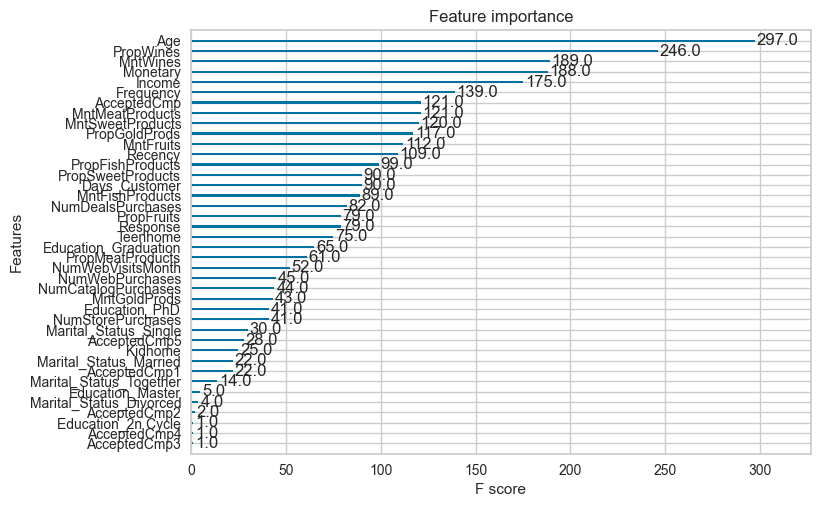

In [65]:
# Xgboost Feature Importance for K-Means Labels
try:
    plot_importance(model_xgb[len(model_xgb)-1])
except:
    plot_importance(model_xgb)

In [66]:
# Age vs Prop Wines
px.scatter(
    df_predictions.query("Age < 100"),
    x = 'Age',
    y = 'PropWines',
    color='Label',
    opacity = 0.4,  
    trendline = "ols",
    trendline_color_override = 'white',
    trendline_scope="overall",
    template='plotly_dark',
    width = 800,
    height = 600
).update_traces(
    marker={
        'size': 12,
        'line': {
            'width': 1,
            'color': "white"
        }
    }
)

![Alt text](lab86_7.png)

In [67]:
# Monetary vs Income
px.scatter(
    df_predictions.query("Income < 600000"),
    x = 'Monetary',
    y = 'Income',
    color='Label',
    opacity = 0.4,  
    trendline = "lowess",
    trendline_color_override = 'white',
    trendline_scope='overall',
    template='plotly_dark',
    width = 800,
    height = 600
).update_traces(
    marker={
        'size': 12,
        'line': {
            'width': 1,
            'color': "white"
        }
    }
)

![Alt text](lab86_8.png)

In [68]:
# RFM Features
px.scatter_3d(
    df_predictions.query("Income < 600000"),
    x = 'Recency',
    y = 'Frequency',
    z = 'Monetary',
    color='Label',
    opacity = 0.4,
    template='plotly_dark',
    width = 800,
    height = 800
).update_traces(
    marker={
        'size': 12,
        'line': {
            'width': 1,
            'color': "white"
        }
    }
)

![Alt text](lab86_9.png)

# STEP 6 EXPLAINING THE CLUSTER GROUPS

In [69]:
# Find median value by cluster
df_samples_to_explain = df_predictions \
    .groupby("label", group_keys=False) \
    .median() 

df_samples_to_explain 

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Score
label,,,,,,,,,,,,,,,,,,,,,
0,1973.0,81698.0,0.0,0.0,43.0,957.0,29.0,430.0,51.0,40.0,...,0,0,0,0,0,0,0,0,0,0.9980
1,1976.0,30467.0,1.0,0.0,49.0,12.0,3.0,14.0,6.0,4.0,...,0,0,0,0,0,0,0,0,0,0.9999
2,1964.0,50521.5,0.0,1.0,49.0,199.0,4.0,51.0,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0.9996
3,1967.0,71493.5,0.0,0.0,53.0,458.5,55.5,349.0,80.0,54.0,...,0,0,0,0,0,0,0,0,0,0.9995


In [70]:
# Filter out columns that are constant
cols = df_samples_to_explain.columns
_filter = df_samples_to_explain.nunique()==1
_filter

Year_Birth                 False
Income                     False
Kidhome                    False
Teenhome                   False
Recency                    False
MntWines                   False
MntFruits                  False
MntMeatProducts            False
MntFishProducts            False
MntSweetProducts           False
MntGoldProds               False
NumDealsPurchases          False
NumWebPurchases            False
NumCatalogPurchases        False
NumStorePurchases          False
NumWebVisitsMonth          False
AcceptedCmp3                True
AcceptedCmp4                True
AcceptedCmp5               False
AcceptedCmp1               False
AcceptedCmp2                True
Complain                    True
Z_CostContact               True
Z_Revenue                   True
Response                   False
Days_Customer              False
Age                        False
AcceptedCmp                False
Monetary                   False
Frequency                  False
PropWines 

In [71]:
cols_to_drop = cols[_filter]

In [72]:
pd.set_option('display.max_columns', None)

In [73]:
# Drop 
df_samples_to_explain.drop(columns=cols_to_drop)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp5,AcceptedCmp1,Response,Days_Customer,Age,AcceptedCmp,Monetary,Frequency,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds,Education_Graduation,Score
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1973.0,81698.0,0.0,0.0,43.0,957.0,29.0,430.0,51.0,40.0,51.0,1.0,5.0,6.0,8.0,3.0,1.0,1.0,1.0,526.0,41.0,2.0,1674.0,21.0,0.557666,0.019515,0.258621,0.035813,0.025822,0.037594,0,0.9980
1,1976.0,30467.0,1.0,0.0,49.0,12.0,3.0,14.0,6.0,4.0,11.0,1.0,2.0,0.0,3.0,7.0,0.0,0.0,0.0,495.0,38.0,0.0,57.0,7.0,0.250000,0.058824,0.250000,0.094488,0.061475,0.200000,1,0.9999
2,1964.0,50521.5,0.0,1.0,49.0,199.0,4.0,51.0,4.0,3.0,19.0,3.0,4.0,1.0,5.0,6.0,0.0,0.0,0.0,503.5,50.0,0.0,328.0,15.5,0.674849,0.009499,0.173233,0.012953,0.008829,0.071645,0,0.9996
3,1967.0,71493.5,0.0,0.0,53.0,458.5,55.5,349.0,80.0,54.0,57.0,1.0,5.0,5.0,9.0,3.0,0.0,0.0,0.0,544.0,47.0,0.0,1156.0,21.0,0.407617,0.048252,0.298606,0.072222,0.047978,0.054864,1,0.9995


# CLUSTER INSIGHTS:
- Low Income (Cluster 1): Has kid(s) at home, Low Spend, Purchases "Gold Prods", "Meat Prods"
- High Income (Clusters 0, 2, 3): Spend more on Wine
- Cluster 0 (Highest Spenders): Accept Campaigns the most, have high In store and Catalog purchases


# This Is The End Of The Project, Thank You!